In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yakhyokhuja/affectnetaligned")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/affectnetaligned


In [ ]:
from keras.utils import to_categorical

# Define the paths to the dataset directories
train_dir = path + '/AffectNetCustom/train'
test_dir = path + '/AffectNetCustom/test'
val_dir = path + '/AffectNetCustom/val'

# Define the image size and number of classes
img_size = (48, 48)
num_classes = 8


# Create a mapping from class names to numerical labels
class_names = ['0', '1', '2', '3', '4', '5', '6', '7']
'''
  "Anger",	0
  "Disgust",	1
  "Fear",	2
  "Happiness",3
  "Sadness",	4
  "Surprise",	5
  "Neutre",	6
  "Contempt"	7
'''
class_to_label = {class_name: i for i, class_name in enumerate(class_names)}
print(class_to_label)

# Function to load images and labels from a directory
def load_images_and_labels(directory, img_size, num_classes):
    images = []
    labels = []

    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Get the numerical label for the current class
        label = class_to_label.get(class_name)
        if label is None:
            print(f"Skipping unknown class: {class_name}")
            continue

        print(f"Loading images from class: {class_name} (Label: {label})")

        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            try:
                # Load image in grayscale mode
                image = Image.open(image_path).convert('RGB')  # 'L' mode for grayscale
                image = image.resize(img_size)
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

    images = np.array(images)
    labels = np.array(labels)

    # Convert labels to categorical format
    labels = to_categorical(labels, num_classes=num_classes)
    labels = labels.reshape((-1, num_classes))

    return images, labels

# Load all data from train, test, and val directories
train_images, train_labels = load_images_and_labels(train_dir, img_size, num_classes)
test_images, test_labels = load_images_and_labels(test_dir, img_size, num_classes)
val_images, val_labels = load_images_and_labels(val_dir, img_size, num_classes)

# Combine all data into a single dataset
all_images = np.concatenate((train_images, test_images, val_images), axis=0)
all_labels = np.concatenate((train_labels, test_labels, val_labels), axis=0)

# Shuffle the combined dataset
indices = np.arange(all_images.shape[0])
np.random.shuffle(indices)

all_images = all_images[indices]
all_labels = all_labels[indices]

# Split the shuffled dataset into train, test, and val sets
train_size = int(0.8 * all_images.shape[0])  # 80% for training
val_size = int(0.1 * all_images.shape[0])    # 10% for validation
test_size = all_images.shape[0] - train_size - val_size  # Remaining 10% for testing

train_images = all_images[:train_size]
train_labels = all_labels[:train_size]

val_images = all_images[train_size:train_size + val_size]
val_labels = all_labels[train_size:train_size + val_size]

test_images = all_images[train_size + val_size:]
test_labels = all_labels[train_size + val_size:]


# Print the shapes of the loaded data
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Validation labels shape: {val_labels.shape}")

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7}
Loading images from class: 7 (Label: 7)
Loading images from class: 2 (Label: 2)
Loading images from class: 5 (Label: 5)
Loading images from class: 0 (Label: 0)
Loading images from class: 3 (Label: 3)
Loading images from class: 1 (Label: 1)
Loading images from class: 4 (Label: 4)
Loading images from class: 6 (Label: 6)
Loading images from class: 7 (Label: 7)
Loading images from class: 2 (Label: 2)
Loading images from class: 5 (Label: 5)
Loading images from class: 0 (Label: 0)
Loading images from class: 3 (Label: 3)
Loading images from class: 1 (Label: 1)
Loading images from class: 4 (Label: 4)
Loading images from class: 6 (Label: 6)
Loading images from class: 7 (Label: 7)
Loading images from class: 2 (Label: 2)
Loading images from class: 5 (Label: 5)
Loading images from class: 0 (Label: 0)
Loading images from class: 3 (Label: 3)
Loading images from class: 1 (Label: 1)
Loading images from class: 4 (Label: 4)
Loading images 

[1. 0. 0. 0. 0. 0. 0. 0.]


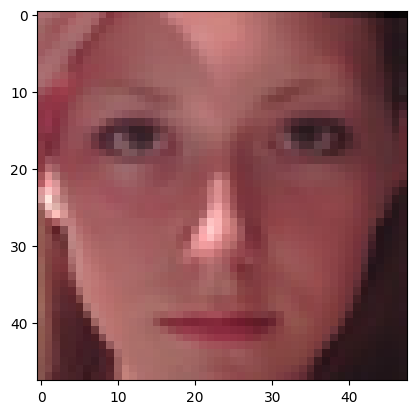

In [ ]:
import matplotlib.pyplot as plt

print(train_labels[3447])
plt.imshow(train_images[3447])
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.regularizers import l2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,3), kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,481,416 (20.91 MB)

 Trainable params: 5,481,416 (20.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val-loss', mode="min", patience=5, restore_best_weights=True)

hist = model.fit(train_images, train_labels, batch_size=64, epochs=75, shuffle=True, validation_data=(val_images, val_labels), callbacks=[early_stop, reduce_lr])

Epoch 1/75
520/520 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.1321 - loss: 4.0845 - val_accuracy: 0.1760 - val_loss: 2.8615 - learning_rate: 1.0000e-04
Epoch 2/75


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val-loss` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


520/520 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.1647 - loss: 2.6917 - val_accuracy: 0.3034 - val_loss: 2.1948 - learning_rate: 1.0000e-04
Epoch 3/75
520/520 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.3032 - loss: 2.1440 - val_accuracy: 0.3686 - val_loss: 1.9281 - learning_rate: 1.0000e-04
Epoch 4/75
520/520 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.3605 - loss: 1.9136 - val_accuracy: 0.3985 - val_loss: 1.7837 - learning_rate: 1.0000e-04
Epoch 5/75
520/520 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.3959 - loss: 1.7970 - val_accuracy: 0.4197 - val_loss: 1.7052 - learning_rate: 1.0000e-04
Epoch 6/75
520/520 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.4237 - loss: 1.7143 - val_accuracy: 0.4385 - val_loss: 1.6597 - learning_rate: 1.0000e-04
Epoch 7/75
520/520 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.4479 - loss: 1.6622 - val_accuracy: 0.4582 - val_loss: 1.6069 - learning_rate: 1.0000e-04
Epoch 8/75
520/520 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accurac

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
saved_model_path = '/content/drive/MyDrive'

Mounted at /content/drive


In [ ]:
model.save(saved_model_path + '/FER_complicated_CNN_AffectNet_Aligned.keras', overwrite=True)
model.save(saved_model_path + '/FER_complicated_CNN_AffectNet_Aligned.h5',overwrite=True)

In [ ]:
# Load pretrained model (if necessary)
from tensorflow.keras.models import load_model
model = load_model(saved_model_path + '/FER_complicated_CNN_AffectNet_Aligned.h5')

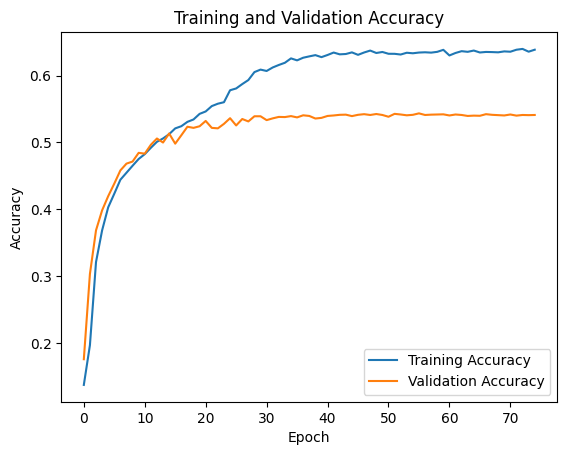

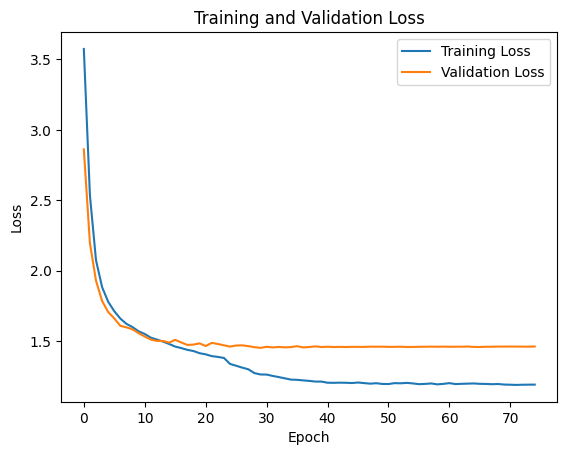

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5442 - loss: 1.4453
Validation Loss: 1.4160164594650269
Validation Accuracy: 0.5492414832115173


130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


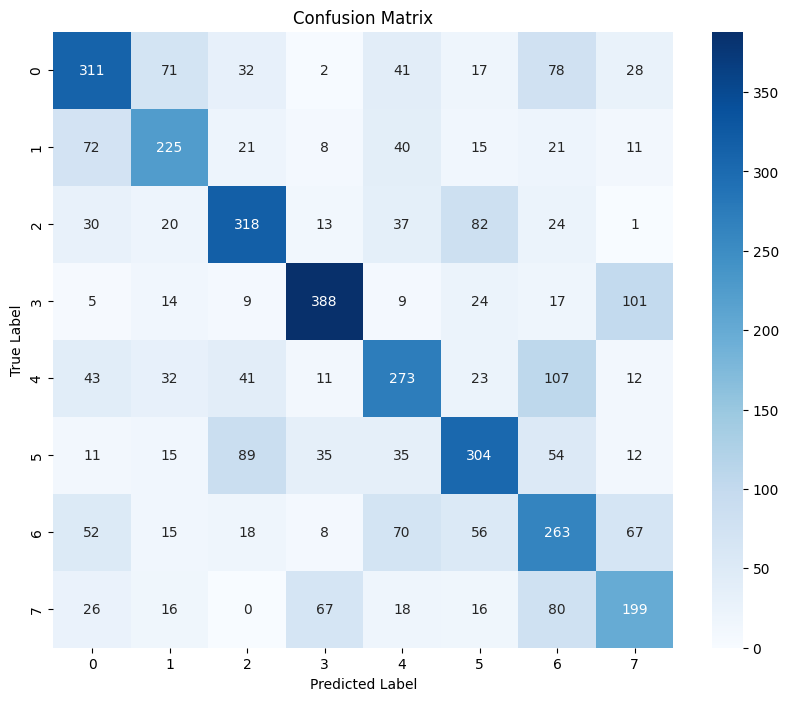


Classification Report:
              precision    recall  f1-score   support

           0     0.5655    0.5362    0.5504       580
           1     0.5515    0.5448    0.5481       413
           2     0.6023    0.6057    0.6040       525
           3     0.7293    0.6843    0.7061       567
           4     0.5220    0.5037    0.5127       542
           5     0.5661    0.5477    0.5568       555
           6     0.4084    0.4791    0.4409       549
           7     0.4617    0.4716    0.4666       422

    accuracy                         0.5492      4153
   macro avg     0.5508    0.5466    0.5482      4153
weighted avg     0.5542    0.5492    0.5511      4153


Weighted Precision: 0.5542
Weighted Recall: 0.5492
Weighted F1-Score: 0.5511


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names, digits=4))

# Additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"\nWeighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")